In [1]:
#!pip install geopandas

In [2]:
import geopandas as gpd
from geoband import API
from shapely.geometry import Polygon, Point

import time
import fnmatch
import sys
import numpy as np

from scipy.stats import mannwhitneyu
from statsmodels.sandbox.stats.multicomp import multipletests
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.formula.api as smf 
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')


In [3]:
import os
import pandas as pd
import pathlib
print(os.getcwd())

/opt/app-root/src


In [4]:
input_path = pathlib.Path('./input')
if not input_path.is_dir():
    input_path.mkdir()
    
API.GetCompasData('SBJ_2012_001', '1', '1.오산시_주정차단속(2018~2020).csv')
API.GetCompasData('SBJ_2012_001', '2', '2.오산시_어린이교통사고_격자.geojson')
API.GetCompasData('SBJ_2012_001', '3', '3.오산시_차량등록현황_격자.geojson')
API.GetCompasData('SBJ_2012_001', '4', '4.오산시_연령별_거주인구격자(총인구).geojson')
API.GetCompasData('SBJ_2012_001', '5', '5.오산시_연령별_거주인구격자(유소년).geojson')
API.GetCompasData('SBJ_2012_001', '6', '6.오산시_연령별_거주인구격자(생산가능인구).geojson')
API.GetCompasData('SBJ_2012_001', '7', '7.오산시_연령별_거주인구격자(고령).geojson')
API.GetCompasData('SBJ_2012_001', '8', '8.오산시_유동인구(2019).csv')
API.GetCompasData('SBJ_2012_001', '9', '9.오산시_어린이보호구역.csv')
API.GetCompasData('SBJ_2012_001', '10', '10.오산시_학교위치정보.csv')
API.GetCompasData('SBJ_2012_001', '11', '11.오산시_초등학교_통학구.geojson')
API.GetCompasData('SBJ_2012_001', '12', '12.오산시_중학교_학군.geojson')
API.GetCompasData('SBJ_2012_001', '13', '13.오산시_어린이집_유치원현황.csv')
API.GetCompasData('SBJ_2012_001', '14', '14.오산시_기상데이터(2010~2019).csv')
API.GetCompasData('SBJ_2012_001', '15', '15.오산시_무인교통단속카메라.csv')
API.GetCompasData('SBJ_2012_001', '16', '16.오산시_도로안전표지표준데이터.csv')
API.GetCompasData('SBJ_2012_001', '17', '17.오산시_횡단보도.geojson')
API.GetCompasData('SBJ_2012_001', '18', '18.오산시_과속방지턱표준데이터.csv')
API.GetCompasData('SBJ_2012_001', '19', '19.오산시_신호등.geojson')
API.GetCompasData('SBJ_2012_001', '20', '20.오산시_CCTV설치현황.csv')
API.GetCompasData('SBJ_2012_001', '21', '21.오산시_인도.geojson')
API.GetCompasData('SBJ_2012_001', '22', '22.오산시_버스정류장.csv')
API.GetCompasData('SBJ_2012_001', '23', '23.오산시_상세도로망_LV6.geojson')
API.GetCompasData('SBJ_2012_001', '24', '24.평일_전일,시간대별_오산시_추정교통량_Level6.csv')
API.GetCompasData('SBJ_2012_001', '25', '25.평일_전일_오산시_혼잡빈도강도_Level6.csv')
API.GetCompasData('SBJ_2012_001', '26', '26.평일_전일_오산시_혼잡시간강도_Level6.csv')
API.GetCompasData('SBJ_2012_001', '27', '27.오산시_도로명주소_건물.geojson')
API.GetCompasData('SBJ_2012_001', '28', '28.오산시_건물연면적_격자.geojson')
API.GetCompasData('SBJ_2012_001', '29', '29.오산시_체육시설현황.csv')
API.GetCompasData('SBJ_2012_001', '30', '30.오산시_학원_및_교습소_현황.csv')
API.GetCompasData('SBJ_2012_001', '31', '31.오산시_법정경계(시군구).geojson')
API.GetCompasData('SBJ_2012_001', '32', '32.오산시_행정경계(읍면동).geojson')
API.GetCompasData('SBJ_2012_001', '33', '33.오산시_법정경계(읍면동).geojson')
API.GetCompasData('SBJ_2012_001', '34', '34.오산시_지적도.geojson')
API.GetCompasData('SBJ_2012_001', '35', '35.코드정의서.xlsx')


for path in list(input_path.glob('*.csv')) + list(input_path.glob('*.geojson')):
    print(path)

In [5]:
mod = sys.modules[__name__]

for filename in os.listdir()[7:]:
    num = filename.split('.')[0]
    
    if fnmatch.fnmatch(filename, '*.csv'):
        setattr(mod, 'df_{}'.format(num),  pd.read_csv(filename))

    elif fnmatch.fnmatch(filename, '*.geojson'):
        setattr(mod, 'df_{}'.format(num), gpd.read_file(filename))

In [6]:
def multipolygon_to_coordinates(x): 
    lon, lat = x[0].exterior.xy 
    return [[x, y] for x, y in zip(lon, lat)] 

def polygon_to_coordinates(x): 
    lon, lat = x.exterior.xy 
    return [[x, y] for x, y in zip(lon, lat)] 

In [7]:
df_2['coordinates'] = df_2['geometry'].apply(multipolygon_to_coordinates)

In [8]:
df_2_list = []
df_2_list2 = []

for i in df_2['geometry']:
    cent = [[i[0].centroid.coords[0][0],i[0].centroid.coords[0][1]]]
    df_2_list.append(cent)
    df_2_list2.append(Point(cent[0]))
    
df_2['coord_cent'] = 0
df_2['geo_cent'] = 0

df_2['geo_cent'] = df_2_list2 # geopandas를 위한 geometry type
df_2['coord_cent']= pd.DataFrame(df_2_list) # pydeck을 위한 coordinate type

In [9]:
df_2['grid_id']=0
idx = []

for i in range(len(df_2)):
    idx.append(str(i).zfill(5))
df_2['grid_id'] = pd.DataFrame(idx)

# 사고 횟수가 가장 높은 위치
#df_2.iloc[df_2["accident_cnt"].sort_values(ascending=False).index].reindex().head()

In [10]:
for i in range(len(df_2)):
    df_2.loc[i, 'min_lon'] = df_2.loc[i, 'geometry'].bounds[0]
    df_2.loc[i, 'max_lon'] = df_2.loc[i, 'geometry'].bounds[2]
    df_2.loc[i, 'min_lat'] = df_2.loc[i, 'geometry'].bounds[1]
    df_2.loc[i, 'max_lat'] = df_2.loc[i, 'geometry'].bounds[3]

In [11]:
df_2['사고정규화'] = df_2['accident_cnt'] / df_2['accident_cnt'].max()

In [12]:
df_2['geometry'].nunique() #총 격자는 4510개

4510

## 변수 추가

In [13]:
final_df = df_2.copy()

In [14]:
# bounds의 경도 최대 최소 차는 약 0.0011 / 위도 최대 최소 차는 약 0.0009

### df_1 (주정차단속)

In [15]:
#!pip install haversine
#from haversine import haversine

In [16]:
%%time

final_df['주정차단속'] = 0

for i in range(len(df_1)):
    lon, lat = df_1.loc[i, '단속위치_경도'], df_1.loc[i, '단속위치_위도']
    tmp_df = final_df[(final_df['max_lon'] >= lon) & (final_df['min_lon'] <= lon)
                     & (final_df['max_lat'] >= lat) & (final_df['min_lat'] <= lat)].index
    
    final_df.loc[tmp_df, '주정차단속'] += 1

CPU times: user 3min 36s, sys: 1.17 s, total: 3min 37s
Wall time: 3min 49s


In [17]:
print(final_df['주정차단속'].sum(), df_1.shape[0])

61815 61701


In [18]:
#final_df.to_csv('final_df.csv', index = False)

### df_4 (총인구)

In [19]:
final_df = pd.merge(final_df, df_4.fillna(0).rename({'val':'총인구'}, axis = 1)[['gid', '총인구']], on = 'gid', how = 'left')

### df_5 (유소년인구현황)

In [20]:
final_df = pd.merge(final_df, df_5.fillna(0).rename({'val':'유소년인구'}, axis = 1)[['gid', '유소년인구']], on = 'gid', how = 'left')

### df_6 (생산가능인구)

In [21]:
final_df = pd.merge(final_df, df_6.fillna(0).rename({'val':'생산가능인구'}, axis = 1)[['gid', '생산가능인구']], on = 'gid', how = 'left')

### df_8 (유동인구)

In [22]:
# 결측치 없음

df_8['등교(08-10)'], df_8['하교(14-18)'], df_8['이외유동(18-22)'] = 0, 0, 0

df_8['등교(08-10)'] = df_8.loc[:, 'TMST_08':'TMST_10'].sum(axis = 1)
df_8['하교(14-18)'] = df_8.loc[:, 'TMST_14':'TMST_18'].sum(axis = 1)
df_8['이외유동(18-22)'] = df_8.loc[:, 'TMST_18':'TMST_22'].sum(axis = 1)

In [23]:
%%time

final_df['등교(08-10)'], final_df['하교(14-18)'], final_df['이외유동(18-22)'] = 0, 0, 0

for i in range(len(df_8)):
    lon, lat = df_8.loc[i, 'lon'], df_8.loc[i, 'lat']
    등교, 하교, 이외 = df_8.loc[i, '등교(08-10)'], df_8.loc[i, '하교(14-18)'], df_8.loc[i, '이외유동(18-22)']
    
    tmp_df = final_df[(final_df['max_lon'] >= lon) & (final_df['min_lon'] <= lon)
                     & (final_df['max_lat'] >= lat) & (final_df['min_lat'] <= lat)].index
    
    final_df.loc[tmp_df, '등교(08-10)'] += 등교
    final_df.loc[tmp_df, '하교(14-18)'] += 하교
    final_df.loc[tmp_df, '이외유동(18-22)'] += 이외

CPU times: user 11min 31s, sys: 2.62 s, total: 11min 34s
Wall time: 12min 11s


### df_9 (어린이보호구역 현황)

In [24]:
%%time

final_df['어린이보호구역'] = 0

for i in range(len(df_9)):
    lon, lat = df_9.loc[i, '보호구역_경도'], df_9.loc[i, '보호구역_위도']
    tmp_df = final_df[(final_df['max_lon'] >= lon) & (final_df['min_lon'] <= lon)
                     & (final_df['max_lat'] >= lat) & (final_df['min_lat'] <= lat)].index
    
    final_df.loc[tmp_df, '어린이보호구역'] += 1

CPU times: user 357 ms, sys: 18.2 ms, total: 375 ms
Wall time: 414 ms


In [25]:
#final_df.to_csv('final_df.csv', index = False)

### df_10 (학교위치정보)

In [26]:
%%time

df_10 = df_10.query('학교구분 == "초등학교"')

final_df['초등학교'] = 0

for i, v in df_10.iterrows():
    for j, p in final_df.iterrows():
        if Point([v['학교위치_경도'], v['학교위치_위도']]).within(p['geometry']):
            final_df['초등학교'].loc[j] += 1    
            continue

CPU times: user 14.5 s, sys: 4.54 ms, total: 14.5 s
Wall time: 15.3 s


### df_11 (초등학교통학구)

In [27]:
%%time

final_df['인접초등학교통학구'] = 0.0

for i in range(0, len(final_df)):
    for j in range(0, len(df_11)):
        final_df['인접초등학교통학구'][i] += final_df['geometry'][i].intersection(df_11['geometry'][j]).area
        #if (v['geometry'].intersects(p['geometry'])) or (v['geometry'].crosses(p['geometry'])):
        #    final_df['인접초등학교통학구'].loc[j] += v['geometry']

CPU times: user 57.9 s, sys: 3.81 ms, total: 57.9 s
Wall time: 1min


### df_13 (어린이집/유치원)

In [28]:
%%time

final_df['어린이집_유치원'] = 0

for i, v in df_13.iterrows():
    for j, p in final_df.iterrows():
        if Point([v['시설위치_경도'], v['시설위치_위도']]).within(p['geometry']):
            final_df['어린이집_유치원'].loc[j] += 1     

CPU times: user 3min 8s, sys: 70.7 ms, total: 3min 9s
Wall time: 3min 19s


### df_30 (학원/교습소)

> '고등', '중등', '자격증'이라는 단어를 포함한 것과 교급과정명이 없는 학원 및 교습소는 제외시킴

In [29]:
df_30 = df_30[df_30['교습과정명'].isnull() == False]
df_30 = df_30[(df_30['교습과정명'].str.contains('고등')==False) & (df_30['교습과정명'].str.contains('중등')==False)
     & (df_30['교습과정명'].str.contains('자격증')==False)].reset_index(drop = True)

In [30]:
%%time

final_df['학원_교습소'] = 0

for i in range(len(df_30)):
    lon, lat = df_30.loc[i, '시설위치_경도'], df_30.loc[i, '시설위치_위도']
    tmp_df = final_df[(final_df['max_lon'] >= lon) & (final_df['min_lon'] <= lon)
                     & (final_df['max_lat'] >= lat) & (final_df['min_lat'] <= lat)].index
    
    final_df.loc[tmp_df, '학원_교습소'] += 1

CPU times: user 4.35 s, sys: 30.1 ms, total: 4.38 s
Wall time: 4.64 s


In [31]:
#final_df.to_csv('final_df.csv', index = False)

### df_15 (무인교통단속)

In [32]:
%%time

final_df['무인교통단속'] = 0

for i, v in df_15.iterrows():
    for j, p in final_df.iterrows():
        if Point([v['설치위치_경도'], v['설치위치_위도']]).within(p['geometry']):
            final_df['무인교통단속'].loc[j] += 1    

CPU times: user 1min 8s, sys: 22.8 ms, total: 1min 8s
Wall time: 1min 12s


### df_16 (도로안전표지판)

In [33]:
%%time

final_df['도로안전표지판'] = 0

for i in range(len(df_16)):
    lon, lat = df_16.loc[i, 'lon'], df_16.loc[i, 'lat']
    tmp_df = final_df[(final_df['max_lon'] >= lon) & (final_df['min_lon'] <= lon)
                     & (final_df['max_lat'] >= lat) & (final_df['min_lat'] <= lat)].index
    
    final_df.loc[tmp_df, '도로안전표지판'] += 1

CPU times: user 2.84 s, sys: 18.1 ms, total: 2.86 s
Wall time: 3.03 s


### df_17 (횡단보도)
> 횡단보도의 무게중심(centroid)를 추출해서 point 찾는 방식으로 변환

In [34]:
lon = []
lat = []

for i in df_17['geometry']:
    cent = [[i[0].centroid.coords[0][0],i[0].centroid.coords[0][1]]]
    lon.append(cent[0][0])
    lat.append(cent[0][1])
    
df_17['lon'], df_17['lat'] = 0, 0
df_17['lon'], df_17['lat'] = lon, lat

In [35]:
%%time

final_df['횡단보도'] = 0

for i in range(len(df_17)):
    lon, lat = df_17.loc[i, 'lon'], df_17.loc[i, 'lat']
    tmp_df = final_df[(final_df['max_lon'] >= lon) & (final_df['min_lon'] <= lon)
                     & (final_df['max_lat'] >= lat) & (final_df['min_lat'] <= lat)].index
    
    final_df.loc[tmp_df, '횡단보도'] += 1 

CPU times: user 4.16 s, sys: 43.3 ms, total: 4.2 s
Wall time: 4.45 s


### df_18 (과속방지턱)

In [36]:
%%time

final_df['과속방지턱'] = 0

for i in range(len(df_18)):
    lon, lat = df_18.loc[i, '설치위치_경도'], df_18.loc[i, '설치위치_위도']
    tmp_df = final_df[(final_df['max_lon'] >= lon) & (final_df['min_lon'] <= lon)
                     & (final_df['max_lat'] >= lat) & (final_df['min_lat'] <= lat)].index
    
    final_df.loc[tmp_df, '과속방지턱'] += 1 

CPU times: user 124 ms, sys: 13.1 ms, total: 137 ms
Wall time: 151 ms


In [37]:
#final_df.to_csv('final_df.csv', index = False)

### df_19 (신호등)

In [38]:
%%time

final_df['신호등'] = 0

for i in range(len(df_19)):
    lon, lat = df_19['geometry'][i].x, df_19['geometry'][i].y
    tmp_df = final_df[(final_df['max_lon'] >= lon) & (final_df['min_lon'] <= lon)
                     & (final_df['max_lat'] >= lat) & (final_df['min_lat'] <= lat)].index
    
    final_df.loc[tmp_df, '신호등'] += 1 

CPU times: user 5.07 s, sys: 19 ms, total: 5.09 s
Wall time: 5.38 s


In [39]:
#final_df.to_csv('final_df.csv', index = False)

### df_20 (CCTV)

In [40]:
for i in range(len(df_20)):
    if df_20.loc[i, '설치위치_위도'] > 100:
        tmp = df_20.loc[i, '설치위치_위도']
        df_20.loc[i, '설치위치_위도'] = df_20.loc[i, '설치위치_경도']
        df_20.loc[i, '설치위치_경도'] = tmp

In [41]:
%%time

final_df['CCTV'] = 0

for i in range(len(df_20)):
    lon, lat = df_20.loc[i, '설치위치_경도'], df_20.loc[i, '설치위치_위도']
    tmp_df = final_df[(final_df['max_lon'] >= lon) & (final_df['min_lon'] <= lon)
                     & (final_df['max_lat'] >= lat) & (final_df['min_lat'] <= lat)].index
    
    final_df.loc[tmp_df, 'CCTV'] += 1 

CPU times: user 1.99 s, sys: 21.1 ms, total: 2.01 s
Wall time: 2.14 s


### df_22 (버스정류장)

In [42]:
%%time

final_df['버스정류장'] = 0

for i in range(len(df_22)):
    lon, lat = df_22.loc[i, '정류장 위치_경도'], df_22.loc[i, '정류장 위치_위도']
    tmp_df = final_df[(final_df['max_lon'] >= lon) & (final_df['min_lon'] <= lon)
                     & (final_df['max_lat'] >= lat) & (final_df['min_lat'] <= lat)].index
    
    final_df.loc[tmp_df, '버스정류장'] += 1 

CPU times: user 1.44 s, sys: 16.1 ms, total: 1.45 s
Wall time: 1.54 s


### 도로 정보 변수

- df_23 / df_24 / df_25 (상세 도로망 / 혼합빈도강도 / 혼합시간강도)

In [43]:
df_24_1 = df_24.groupby(['상세도로망_LinkID', '평일주말'])[['전체 추정교통량', '승용차 추정교통량', '버스 추정교통량', '화물차 추정교통량']].sum().reset_index(drop = False)
df_25_1 = df_25.groupby('상세도로망_LinkID')['혼잡빈도강도'].sum().reset_index(drop = False)
df_traffic = pd.merge(df_24_1, df_25_1, how = 'right', on = '상세도로망_LinkID').drop('평일주말', axis = 1)
df_traffic['link_id'] = df_traffic['상세도로망_LinkID'].apply(lambda x: str(x)[:-2])
df_traffic = pd.merge(df_23[['link_id', 'max_speed', 'length', 'width', 'up_lanes', 'dw_lanes', 'oneway', 'barrier', 'geometry']], df_traffic,
                      how = 'left', on = 'link_id').dropna().reset_index(drop = True).drop('상세도로망_LinkID', axis = 1)

In [44]:
df_traffic['max_speed'] = df_traffic['max_speed'].astype('float')
df_traffic['length'] = df_traffic['length'].astype('float')
df_traffic['width'] = df_traffic['width'].astype('float')
df_traffic['oneway'] = df_traffic['oneway'].astype('int')
df_traffic['barrier'] = df_traffic['width'].astype('int')
df_traffic['up_lanes'] = df_traffic['up_lanes'].astype('int')
df_traffic['dw_lanes'] = df_traffic['dw_lanes'].astype('int')

In [45]:
df_traffic

,link_id,max_speed,length,width,up_lanes,dw_lanes,oneway,barrier,geometry,전체 추정교통량,승용차 추정교통량,버스 추정교통량,화물차 추정교통량,혼잡빈도강도
0,478344746,100.0,0.438,2.0,2,0,1,2,"MULTILINESTRING ((127.00183 37.17475, 127.0002...",59410.04,44514.58,1854.59,13040.90,53.73
1,571200633,0.0,0.057,1.0,1,0,1,1,"MULTILINESTRING ((127.06096 37.14943, 127.0611...",393.27,355.66,3.57,34.05,90.53
2,571200680,60.0,0.017,2.0,1,1,0,2,"MULTILINESTRING ((127.06835 37.15484, 127.0682...",16657.54,15494.97,133.14,1029.49,75.87
3,571200680,60.0,0.017,2.0,1,1,0,2,"MULTILINESTRING ((127.06835 37.15484, 127.0682...",13915.50,12046.22,189.36,1679.89,73.32
4,571200686,60.0,0.073,3.0,2,2,0,3,"MULTILINESTRING ((127.07356 37.14637, 127.0729...",9390.99,8393.18,126.22,871.58,38.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,571376981,100.0,0.643,2.0,2,0,1,2,"MULTILINESTRING ((127.04011 37.17816, 127.0467...",54352.13,40391.27,2041.08,11919.80,45.64
3028,571376982,100.0,0.936,2.0,2,0,1,2,"MULTILINESTRING ((127.04770 37.18087, 127.0478...",54459.13,40471.54,2045.39,11942.16,48.87
3029,571376983,100.0,0.093,2.0,2,0,1,2,"MULTILINESTRING ((127.04674 37.18053, 127.0477...",54484.80,40490.57,2046.42,11947.84,45.08
3030,900000166,0.0,0.065,1.0,1,0,1,1,"MULTILINESTRING ((127.05992 37.16942, 127.0601...",1195.72,1187.02,0.67,8.04,100.00


In [46]:
%%time

final_df['추정교통량_전체'] = 0
final_df['추정교통량_승용차'] = 0
final_df['추정교통량_버스'] = 0
final_df['추정교통량_화물차'] = 0

final_df['혼잡빈도강도'] = 0
final_df['도로수'] = 0
final_df['도로평균제한속도'] = 0
final_df['도로길이'] = 0
final_df['도로폭'] = 0
final_df['중앙분리대'] = 0
final_df['일방통행'] = 0
final_df['상행차로'] = 0
final_df['하행차로'] = 0

for i, v in df_traffic.iterrows():
    for j, p in final_df.iterrows():
        if (v['geometry'].intersects(p['geometry'])) or (v['geometry'].crosses(p['geometry'])):
            final_df['추정교통량_전체'].loc[j] += v['전체 추정교통량']
            final_df['추정교통량_승용차'].loc[j] += v['승용차 추정교통량']
            final_df['추정교통량_버스'].loc[j] += v['버스 추정교통량']
            final_df['추정교통량_화물차'].loc[j] += v['화물차 추정교통량']
            
            final_df['혼잡빈도강도'].loc[j] += v['혼잡빈도강도']
            final_df['도로수'].loc[j] += 1
            final_df['도로평균제한속도'].loc[j] += v['max_speed']
            final_df['도로길이'].loc[j] += v['length']
            final_df['도로폭'].loc[j] += v['width']
            final_df['중앙분리대'].loc[j] += v['barrier']
            final_df['상행차로'].loc[j] += v['up_lanes']
            final_df['하행차로'].loc[j] += v['dw_lanes']
            final_df['일방통행'].loc[j] += v['oneway']

final_df['도로평균제한속도'] /= final_df['도로수']            
final_df['도로길이'] /= final_df['도로수']
final_df['도로폭'] /= final_df['도로수']
final_df['혼잡빈도강도'] /= final_df['도로수']
final_df['중앙분리대'] /= final_df['도로수']
final_df['상행차로'] /= final_df['도로수']
final_df['하행차로'] /= final_df['도로수']
final_df['일방통행'] /= final_df['도로수']

CPU times: user 28min 24s, sys: 1.09 s, total: 28min 26s
Wall time: 29min 56s


In [47]:
final_df = final_df.fillna(0)
final_df = final_df.rename({'등교(08-10)':'등교', '하교(14-18)':'하교', '이외유동(18-22)':'이외유동'}, axis=1)

### 주변 격자 정보 변수

In [48]:
df = final_df.copy()
df = df[['gid', '주정차단속', '총인구', '유소년인구', '생산가능인구', '등교', '하교',
         '이외유동', '어린이보호구역', '초등학교', '인접초등학교통학구', '어린이집_유치원', '학원_교습소',
         '무인교통단속', '도로안전표지판', '횡단보도', '과속방지턱', '신호등', 'CCTV', '혼잡빈도강도',
         '도로수', '도로길이', '도로폭', '추정교통량_전체', '추정교통량_승용차', '추정교통량_버스', '추정교통량_화물차',
         '도로평균제한속도', '버스정류장', '중앙분리대', '상행차로', '하행차로', '일방통행']]

def around(x) : 
    a = ['다사' + str(int(x['gid'][2:5]) - 1) + str(int(x['gid'][2:8]) + 1)[3:6],
         '다사' + str(int(x['gid'][2:5]) + 0) + str(int(x['gid'][2:8]) + 1)[3:6],
         '다사' + str(int(x['gid'][2:5]) + 1) + str(int(x['gid'][2:8]) + 1)[3:6],
         '다사' + str(int(x['gid'][2:5]) - 1) + str(int(x['gid'][2:8]) + 0)[3:6],
         #'다사' + str(int(x['gid'][2:5]) + 0) + str(int(x['gid'][2:8]) + 0)[3:6],
         '다사' + str(int(x['gid'][2:5]) + 1) + str(int(x['gid'][2:8]) + 0)[3:6],
         '다사' + str(int(x['gid'][2:5]) - 1) + str(int(x['gid'][2:8]) - 1)[3:6],
         '다사' + str(int(x['gid'][2:5]) + 0) + str(int(x['gid'][2:8]) - 1)[3:6],
         '다사' + str(int(x['gid'][2:5]) + 1) + str(int(x['gid'][2:8]) - 1)[3:6]]
    a = list(set(a) & set(df['gid']))
    return a

df['around'] = df.apply(around, axis = 1)
df = df.set_index('gid')

a = ['주정차단속_around', '총인구_around', '유소년인구_around', '생산가능인구_around',
     '등교_around', '하교_around', '이외유동_around',
     '어린이보호구역_around', '초등학교_around', '인접초등학교통학구_around',
     '어린이집_유치원_around', '학원_교습소_around', '무인교통단속_around',
     '도로안전표지판_around', '횡단보도_around', '과속방지턱_around', '신호등_around', 
     'CCTV_around', '혼잡빈도강도_around', '도로수_around',
     '도로길이_around', '도로폭_around', '추정교통량_전체_around',
     '추정교통량_승용차_around', '추정교통량_버스_around', '추정교통량_화물차_around',
     '도로평균제한속도_around', '버스정류장_around', '중앙분리대_around', '상행차로_around', '하행차로_around', '일방통행_around']

df[a] = 0.0

for i in df.index :
    df.loc[i, a] = list(df.loc[df.loc[i, 'around'], '주정차단속' : '일방통행'].apply(np.mean, axis = 0))

In [49]:
final_df = pd.merge(final_df, df[[i for i in df.columns if '_around' in i]].reset_index(drop = False), on = 'gid', how = 'left')

In [ ]:
#final_df.to_csv('final_df.csv', index = False)
#final_df = pd.read_csv('final_df_hazard.csv')

In [ ]:
#final_df[['gid', 'accident_cnt', 'geometry', 'coordinates', 'coord_cent',
#       'geo_cent', 'grid_id', 'min_lon', 'max_lon', 'min_lat', 'max_lat']] = df_2[['gid', 'accident_cnt', 'geometry', 'coordinates', 'coord_cent',
#       'geo_cent', 'grid_id', 'min_lon', 'max_lon', 'min_lat', 'max_lat']]

In [50]:
final_df.columns

Index(['gid', 'accident_cnt', 'geometry', 'coordinates', 'coord_cent',
       'geo_cent', 'grid_id', 'min_lon', 'max_lon', 'min_lat', 'max_lat',
       '사고정규화', '주정차단속', '총인구', '유소년인구', '생산가능인구', '등교', '하교', '이외유동',
       '어린이보호구역', '초등학교', '인접초등학교통학구', '어린이집_유치원', '학원_교습소', '무인교통단속',
       '도로안전표지판', '횡단보도', '과속방지턱', '신호등', 'CCTV', '버스정류장', '추정교통량_전체',
       '추정교통량_승용차', '추정교통량_버스', '추정교통량_화물차', '혼잡빈도강도', '도로수', '도로평균제한속도',
       '도로길이', '도로폭', '중앙분리대', '일방통행', '상행차로', '하행차로', '주정차단속_around',
       '총인구_around', '유소년인구_around', '생산가능인구_around', '등교_around', '하교_around',
       '이외유동_around', '어린이보호구역_around', '초등학교_around', '인접초등학교통학구_around',
       '어린이집_유치원_around', '학원_교습소_around', '무인교통단속_around', '도로안전표지판_around',
       '횡단보도_around', '과속방지턱_around', '신호등_around', 'CCTV_around',
       '혼잡빈도강도_around', '도로수_around', '도로길이_around', '도로폭_around',
       '추정교통량_전체_around', '추정교통량_승용차_around', '추정교통량_버스_around',
       '추정교통량_화물차_around', '도로평균제한속도_around', '버스정류장_around', '중앙

In [51]:
final_df.shape

(4510, 76)

In [57]:
for i in final_df.columns[12:]:
    final_df[i] /= final_df[i].max()

# 도로위험도 지수 산출

### 전처리

In [128]:
data1 = final_df.copy()

In [129]:
data1['교통사고'] = 0
for i in range(len(data1)):
    if data1.loc[i, 'accident_cnt'] > 0 :
        data1.loc[i, '교통사고'] = 1

In [130]:
data1 = data1.drop(['gid', 'geometry', 'coordinates', 'coord_cent', 'geo_cent',
                    'grid_id', 'min_lon', 'max_lon', 'min_lat', 'max_lat'], axis = 1)

In [131]:
data1 = data1[(data1['어린이보호구역'] == 0) & (data1['도로수'] > 0)] #어린이 보호구역이 아니며 도로가 있는 곳만

In [132]:
data1.shape

(1678, 68)

In [133]:
data1.columns

Index(['accident_cnt', '사고정규화', '주정차단속', '총인구', '유소년인구', '생산가능인구', '등교', '하교',
       '이외유동', '어린이보호구역', '초등학교', '인접초등학교통학구', '어린이집_유치원', '학원_교습소', '무인교통단속',
       '도로안전표지판', '횡단보도', '과속방지턱', '신호등', 'CCTV', '버스정류장', '추정교통량_전체',
       '추정교통량_승용차', '추정교통량_버스', '추정교통량_화물차', '혼잡빈도강도', '도로수', '도로평균제한속도',
       '도로길이', '도로폭', '중앙분리대', '일방통행', '상행차로', '하행차로', '주정차단속_around',
       '총인구_around', '유소년인구_around', '생산가능인구_around', '등교_around', '하교_around',
       '이외유동_around', '어린이보호구역_around', '초등학교_around', '인접초등학교통학구_around',
       '어린이집_유치원_around', '학원_교습소_around', '무인교통단속_around', '도로안전표지판_around',
       '횡단보도_around', '과속방지턱_around', '신호등_around', 'CCTV_around',
       '혼잡빈도강도_around', '도로수_around', '도로길이_around', '도로폭_around',
       '추정교통량_전체_around', '추정교통량_승용차_around', '추정교통량_버스_around',
       '추정교통량_화물차_around', '도로평균제한속도_around', '버스정류장_around', '중앙분리대_around',
       '상행차로_around', '하행차로_around', '일방통행_around', 'w_hazard', '교통사고'],
      dtype='object')

In [134]:
data1 = data1.drop(['어린이보호구역', '교통사고', '사고정규화'], axis = 1).reset_index(drop = True)

### 다중공선성 확인

- 주변 정보 변수들 중 기존 변수와 상관성이 높은 것을 제거

In [135]:
X, y = data1.drop('accident_cnt', axis = 1), data1['accident_cnt']

In [136]:
high_corr_around = []

for i in [c for c in X.columns if 'around' not in c]:
    for j in [c for c in X.columns if 'around'in c]:
        corr = X[[i, j]].corr().values[0,1]

        if corr > 0.5:            
            high_corr_around.append(j)

print(list(set(high_corr_around)))

['생산가능인구_around', '총인구_around', '추정교통량_승용차_around', '추정교통량_버스_around', '유소년인구_around', '이외유동_around', '혼잡빈도강도_around', '일방통행_around', '추정교통량_전체_around', '인접초등학교통학구_around', '등교_around', '하교_around', '도로길이_around', '하행차로_around', '어린이집_유치원_around', '도로평균제한속도_around', '추정교통량_화물차_around']


In [137]:
# 기존 변수와 상관성이 높은 주변 정보 변수 제거
X = X.drop(list(set(high_corr_around)), axis = 1)

- VIF 값이 10보다 큰 변수들을 확인 후 상관성 높은 변수 쌍들을 확인

In [138]:
y1, X1 = dmatrices('accident_cnt ~ '+'+'.join(X.columns), data=data1, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [format(variance_inflation_factor(X1.values, i), '.2f') for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif['VIF Factor'] = vif['VIF Factor'].astype('float')
vif = vif[vif['VIF Factor'] > 10]
#high_corr_around = [i for i in vif['features'] if 'around' in i]
#print(high_corr_around)
vif.sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
28,inf,중앙분리대
45,inf,중앙분리대_around
43,inf,도로폭_around
27,inf,도로폭
19,2.397445e+12,추정교통량_전체
20,1.536802e+12,추정교통량_승용차
22,7.294519e+10,추정교통량_화물차
21,3.307798e+09,추정교통량_버스
2,3.504100e+02,총인구
4,2.657200e+02,생산가능인구


In [139]:
for i in vif['features']:
    for j in vif['features']:
        try:
            if i != j and i != 'intercept' and j != 'intercept' and  X[[i, j]].corr().values[0,1] > 0.7:
                print(i, j)
        except:
            pass

총인구 유소년인구
총인구 생산가능인구
유소년인구 총인구
유소년인구 생산가능인구
생산가능인구 총인구
생산가능인구 유소년인구
등교 하교
등교 이외유동
하교 등교
하교 이외유동
이외유동 등교
이외유동 하교
추정교통량_전체 추정교통량_승용차
추정교통량_전체 추정교통량_버스
추정교통량_전체 추정교통량_화물차
추정교통량_승용차 추정교통량_전체
추정교통량_승용차 추정교통량_버스
추정교통량_승용차 추정교통량_화물차
추정교통량_버스 추정교통량_전체
추정교통량_버스 추정교통량_승용차
추정교통량_버스 추정교통량_화물차
추정교통량_화물차 추정교통량_전체
추정교통량_화물차 추정교통량_승용차
추정교통량_화물차 추정교통량_버스
도로폭 중앙분리대
도로폭 상행차로
중앙분리대 도로폭
중앙분리대 상행차로
상행차로 도로폭
상행차로 중앙분리대
도로폭_around 중앙분리대_around
도로폭_around 상행차로_around
중앙분리대_around 도로폭_around
중앙분리대_around 상행차로_around
상행차로_around 도로폭_around
상행차로_around 중앙분리대_around


- 높은 상관성을 보이는 변수들 간의 correlation plot 시각화

<AxesSubplot:>

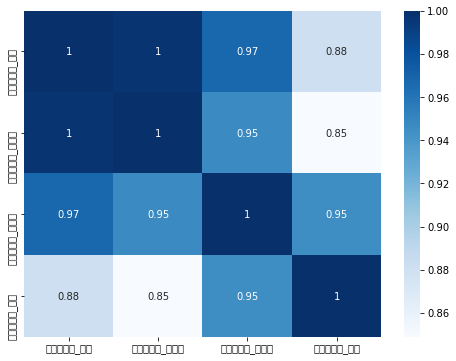

In [140]:
plt.figure(figsize = (8,6))
sns.heatmap(data = X[['추정교통량_전체', '추정교통량_승용차', 
                      '추정교통량_화물차', '추정교통량_버스']].corr(), annot= True, cmap = 'Blues')

> 교통량 분류 간의 상관성이 아주 높은 것을 확인 할 수 있음 -> '추정교통량_전체' 변수만을 사용

<AxesSubplot:>

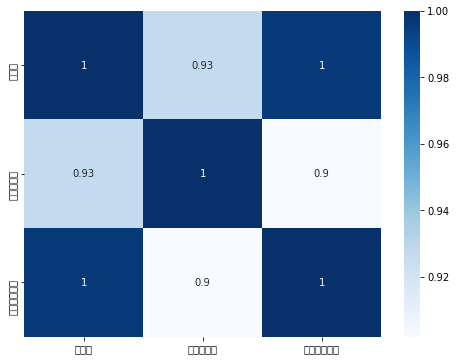

In [141]:
plt.figure(figsize = (8,6))
sns.heatmap(data = X[['총인구', '유소년인구', '생산가능인구']].corr(), annot= True, cmap = 'Blues')

> 인구 분류 간의 상관성이 아주 높은 것을 확인 -> '총인구' 변수만을 사용

<AxesSubplot:>

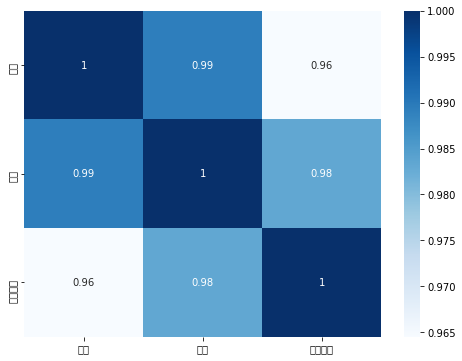

In [142]:
plt.figure(figsize = (8,6))
sns.heatmap(data = X[['등교', '하교', '이외유동']].corr(), annot= True, cmap = 'Blues')

> 인구 유동량의 시간대 분류 변수간 상관성이 아주 높은 것을 확인할 수 있음 -> '하교' 변수만을 사용 (근거는 오산시 보행안전확보 연구 결과)

<AxesSubplot:>

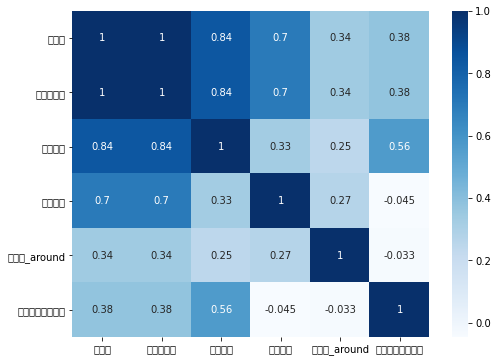

In [143]:
plt.figure(figsize = (8,6))
sns.heatmap(data = X[['도로폭', '중앙분리대', '상행차로', '하행차로', '도로폭_around',  '도로평균제한속도']].corr(), annot= True, cmap = 'Blues')

- VIF 값 10 이상인 변수들을 제거했을 때, 이외 변수들 간의 다중공선성 정도는 심하지 않다는 것을 확인

In [144]:
y1, X1 = dmatrices('accident_cnt ~ '+'+'.join(X.drop(['추정교통량_전체', '추정교통량_승용차','추정교통량_화물차', '추정교통량_버스',
                                                      '총인구', '유소년인구', '생산가능인구', '등교', '하교', '이외유동', 
                                                      '도로폭', '중앙분리대', '상행차로', '하행차로',
                                                      '도로폭_around', '중앙분리대_around', '상행차로_around', ], axis = 1).columns), data=data1, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [format(variance_inflation_factor(X1.values, i), '.2f') for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif['VIF Factor'] = vif['VIF Factor'].astype('float')
#vif = vif[vif['VIF Factor'] > 10]
#high_corr_around = [i for i in vif['features'] if 'around' in i]
#print(high_corr_around)
vif.sort_values(by = 'VIF Factor', ascending = False)

# correlation plot 시각화한 변수 외에는 서로 상관성이 높은 변수가 보이지 않음

,VIF Factor,features
0,25.45,Intercept
24,3.06,횡단보도_around
28,2.65,도로수_around
26,2.55,신호등_around
8,2.25,횡단보도
10,2.13,신호등
14,2.04,도로수
22,1.96,무인교통단속_around
30,1.92,w_hazard
27,1.83,CCTV_around


- 추정교통량_전체, 총인구, 하교, 도로폭, 도로폭_around 변수만을 사용하고 이외 상관성 높은 변수들 삭제

In [145]:
X = X.drop(['추정교통량_승용차','추정교통량_화물차', '추정교통량_버스',
            '유소년인구', '생산가능인구', '등교', '이외유동', 
            '중앙분리대', '상행차로', '하행차로',
            '중앙분리대_around', '상행차로_around', ], axis = 1)

In [146]:
'accident_cnt ~ '+'+'.join(X.columns)

'accident_cnt ~ 주정차단속+총인구+하교+초등학교+인접초등학교통학구+어린이집_유치원+학원_교습소+무인교통단속+도로안전표지판+횡단보도+과속방지턱+신호등+CCTV+버스정류장+추정교통량_전체+혼잡빈도강도+도로수+도로평균제한속도+도로길이+도로폭+일방통행+주정차단속_around+어린이보호구역_around+초등학교_around+학원_교습소_around+무인교통단속_around+도로안전표지판_around+횡단보도_around+과속방지턱_around+신호등_around+CCTV_around+도로수_around+도로폭_around+버스정류장_around+w_hazard'

- 다중공선성 문제 해결 후, 사용할 변수(X.columns) 35개 최종 결정

In [147]:
y1, X1 = dmatrices('accident_cnt ~ '+'+'.join(X.columns), data=data1, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [format(variance_inflation_factor(X1.values, i), '.2f') for i in range(X1.shape[1])]
vif["features"] = X1.columns
vif['VIF Factor'] = vif['VIF Factor'].astype('float')
vif.sort_values(by = 'VIF Factor', ascending = False).head(10)

,VIF Factor,features
0,41.50,Intercept
32,3.39,도로수_around
28,3.09,횡단보도_around
15,2.90,추정교통량_전체
33,2.73,도로폭_around
17,2.73,도로수
30,2.61,신호등_around
10,2.27,횡단보도
18,2.17,도로평균제한속도
12,2.16,신호등


In [148]:
data1 = data1[list(X.columns) + ['accident_cnt']]
data2 = data1.copy()
print(data1.shape)

(1678, 36)


## 음이항 다중회귀모형 적합

In [97]:
data1.columns

Index(['주정차단속', '총인구', '하교', '초등학교', '인접초등학교통학구', '어린이집_유치원', '학원_교습소',
       '무인교통단속', '도로안전표지판', '횡단보도', '과속방지턱', '신호등', 'CCTV', '버스정류장',
       '추정교통량_전체', '혼잡빈도강도', '도로수', '도로평균제한속도', '도로길이', '도로폭', '일방통행',
       '주정차단속_around', '어린이보호구역_around', '초등학교_around', '학원_교습소_around',
       '무인교통단속_around', '도로안전표지판_around', '횡단보도_around', '과속방지턱_around',
       '신호등_around', 'CCTV_around', '도로수_around', '도로폭_around', '버스정류장_around',
       'accident_cnt'],
      dtype='object')

- 어린이 교통사고 추정시 시설물과 관련된 변수는 설명변수에서 제거

In [98]:
# 시설물과 관련된 변수 삭제

data1 = data1.drop(['무인교통단속', '도로안전표지판', '과속방지턱', '신호등', 'CCTV',
                    '무인교통단속_around', '도로안전표지판_around', '과속방지턱_around', '신호등_around', 'CCTV_around'], axis = 1)

### 변수 선택

- Forward Selection

In [99]:
df = data1
y = data1['accident_cnt'] ## 반응 변수
variables = list(data1.drop('accident_cnt', axis =1).columns)
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        #X = sm.add_constant(X)
        formula = "{} ~ {}".format('accident_cnt', ' + '.join(X.columns)) 
        #model = sm.OLS(y,X).fit()
        model = smf.glm(formula , data1, family=sm.families.NegativeBinomial()).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        step += 1
        steps.append(step)
        #adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        #adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break
        
forward_cols = selected_variables
print(steps[-1])

12


In [100]:
forward_cols

['횡단보도',
 '도로수',
 '학원_교습소_around',
 '초등학교_around',
 '하교',
 '혼잡빈도강도',
 '추정교통량_전체',
 '버스정류장',
 '일방통행',
 '초등학교',
 '도로평균제한속도',
 '학원_교습소']

- Backward Elimination

In [101]:
## 후진 소거법
# 후진에서는 모든 변수를 선택했음

df=data1
y = data1['accident_cnt'] ## 반응 변수
variables = list(data1.drop('accident_cnt', axis =1).columns)

selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    X = df[selected_variables]
    formula = "{} ~ {}".format('accident_cnt', ' + '.join(X.columns))
    p_vals = smf.glm(formula, data1, family=sm.families.NegativeBinomial()).fit().pvalues[1:]
    
    #p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        #adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        #adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

backward_cols = selected_variables
print(steps[-1])

12


In [102]:
backward_cols

['하교',
 '초등학교',
 '학원_교습소',
 '횡단보도',
 '버스정류장',
 '추정교통량_전체',
 '혼잡빈도강도',
 '도로수',
 '도로평균제한속도',
 '일방통행',
 '초등학교_around',
 '학원_교습소_around']

In [103]:
both_cols = list(set(forward_cols).intersection(backward_cols))
print(len(forward_cols), len(backward_cols), len(both_cols))
print(both_cols)

12 12 12
['추정교통량_전체', '하교', '도로수', '도로평균제한속도', '일방통행', '초등학교', '혼잡빈도강도', '학원_교습소', '학원_교습소_around', '버스정류장', '횡단보도', '초등학교_around']


In [104]:
'accident_cnt ~ '+'+'.join(both_cols)

'accident_cnt ~ 추정교통량_전체+하교+도로수+도로평균제한속도+일방통행+초등학교+혼잡빈도강도+학원_교습소+학원_교습소_around+버스정류장+횡단보도+초등학교_around'

In [105]:
model = smf.glm(formula = 'accident_cnt ~ '+'+'.join(both_cols), data = data1, family=sm.families.NegativeBinomial()).fit(random_state = 1)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           accident_cnt   No. Observations:                 1678
Model:                            GLM   Df Residuals:                     1665
Model Family:        NegativeBinomial   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -873.04
Date:                Thu, 28 Jan 2021   Deviance:                       817.48
Time:                        03:21:16   Pearson chi2:                 1.52e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.5607      0.239    -14.920      0.000      -4.028      -3.093
추정교통량_전체          2.5475      0.677      3.765      0.000       1.221       3.873
하교                0.9708      0.384      2.529      0.011       0.218       1.723
도로수               2.0730      0.517      4.011      0.000       1.060       3.086
도로평균제한속도          0.8313      0.346      2.402      0.016       0.153       1.510
일방통행             -1.1835      0.318     -3.727      0.000      -1.806      -0.561
초등학교              2.6918      0.965      2.790      0.005       0.801       4.582
혼잡빈도강도            0.9229      0.245      3.765      0.000       0.442       1.403
학원_교습소            1.0090      0.500      2.017      0.044       0.028       1.990
학원_교습소_around     1.5357      0.378      4.058      0.000       0.794       2.277
버스정류장             1.2223      0.338      3.613      0.000       0.559       1.886
횡단보도              2.1346      0.341      6.254      0.000       1.466       2.804
초등학교_around       1.8297      0.335      5.460      0.000       1.173       2.486
=================================================================================
"""

In [106]:
# 격자별 교통사고 위험도 지수 계산

final_df['w_hazard'] = 0

for i in range(1, len(model.params)):
    final_df['w_hazard'] += (model.params[i]*final_df[model.params.index[i]])
    
final_df['w_hazard'] += model.params[0]
final_df['w_hazard'] = np.exp(final_df['w_hazard'])

In [107]:
final_df.isnull().sum().sum()

0

In [108]:
final_df.columns

Index(['gid', 'accident_cnt', 'geometry', 'coordinates', 'coord_cent',
       'geo_cent', 'grid_id', 'min_lon', 'max_lon', 'min_lat', 'max_lat',
       '사고정규화', '주정차단속', '총인구', '유소년인구', '생산가능인구', '등교', '하교', '이외유동',
       '어린이보호구역', '초등학교', '인접초등학교통학구', '어린이집_유치원', '학원_교습소', '무인교통단속',
       '도로안전표지판', '횡단보도', '과속방지턱', '신호등', 'CCTV', '버스정류장', '추정교통량_전체',
       '추정교통량_승용차', '추정교통량_버스', '추정교통량_화물차', '혼잡빈도강도', '도로수', '도로평균제한속도',
       '도로길이', '도로폭', '중앙분리대', '일방통행', '상행차로', '하행차로', '주정차단속_around',
       '총인구_around', '유소년인구_around', '생산가능인구_around', '등교_around', '하교_around',
       '이외유동_around', '어린이보호구역_around', '초등학교_around', '인접초등학교통학구_around',
       '어린이집_유치원_around', '학원_교습소_around', '무인교통단속_around', '도로안전표지판_around',
       '횡단보도_around', '과속방지턱_around', '신호등_around', 'CCTV_around',
       '혼잡빈도강도_around', '도로수_around', '도로길이_around', '도로폭_around',
       '추정교통량_전체_around', '추정교통량_승용차_around', '추정교통량_버스_around',
       '추정교통량_화물차_around', '도로평균제한속도_around', '버스정류장_around', '중앙

In [112]:
#final_df.to_csv('final_df_hazard.csv', index = False)
#data1.to_csv('data1.csv', index = False)

# MCLP (maximal covering location problem)

In [113]:
def generate_candidate_sites(df_result_fin,Weight,M=100):
    sites = []
    hazard = [] #
    idx = df_result_fin.sort_values(by = Weight, ascending = False).iloc[1:M].index
    for i in range(len(idx)):
        random_point = Point(np.array(df_result_fin.loc[idx]['coord_cent'])[i][0],
                             np.array(df_result_fin.loc[idx]['coord_cent'])[i][1])
        random_hazard = np.array(df_result_fin.loc[idx]['w_hazard'])[i] #
        sites.append(random_point)
        hazard.append(random_hazard) #
    return np.array([(p.x,p.y) for p in sites]), np.array(hazard) #

from scipy.spatial import distance_matrix

def mclp(points,K,radius,M,df_result_fin,w,Weight):

    """
    Solve maximum covering location problem
    Input:
        points: input points, Numpy array in shape of [N,2]
        K: the number of sites to select
        radius: the radius of circle
        M: the number of candidate sites, which will randomly generated inside
        the ConvexHull wrapped by the polygon
    Return:
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        f: the optimal value of the objective function
    """
    print('----- Configurations -----')
    print('  Number of points %g' % points.shape[0])
    print('  K %g' % K)
    print('  Radius %g' % radius)
    print('  M %g' % M)
    import time
    start = time.time()
    sites = generate_candidate_sites(df_result_fin,Weight,M)[0]
    hazard = generate_candidate_sites(df_result_fin,Weight,M)[1] #
    J = sites.shape[0]
    I = points.shape[0]
    D = distance_matrix(points,sites)
    mask1 = D<=radius
    D[mask1]=1
    D[~mask1]=0

    from mip import Model, xsum, maximize, BINARY

    # Build model
    m = Model("mclp")
    # Add variables

    x = [m.add_var(name = "x%d" % j, var_type = BINARY) for j in range(J)]
    y = [m.add_var(name = "y%d" % i, var_type = BINARY) for i in range(I)]


    m.objective = maximize(xsum(w[i]*y[i] for i in range (I)))

    m += xsum(x[j] for j in range(J)) == K

    for i in range(I):
        m += xsum(x[j] for j in np.where(D[i]==1)[0]) >= y[i]

    m.optimize()
    
    end = time.time()
    print('----- Output -----')
    print('  Running time : %s seconds' % float(end-start))
    print('  Optimal coverage points: %g' % m.objective_value)

    solution = []
    for i in range(J):
        if x[i].x ==1:
            solution.append(int(x[i].name[1:]))
    opt_sites = sites[solution]
    opt_sites_hazard = hazard[solution] #
    
    return opt_sites, m.objective_value, opt_sites_hazard #

In [114]:
df_fin = final_df[final_df['어린이보호구역'] == 0].reset_index(drop = True)
print(len(df_fin))

4422


In [115]:
import numpy as np

In [116]:
points = []
for i in df_fin['coord_cent'] :
    points.append(i)

w= []
for i in df_fin['w_hazard'] :
    w.append(i)

radius = radius = (1/88.74/1000)*50
K = 50
M = 3000

opt_sites_org,f, opt_sites_hazard = mclp(np.array(points), K, radius, M, df_fin, w, 'w_hazard')

df_opt_sites= pd.DataFrame(opt_sites_org)
df_opt_sites.columns = ['lon', 'lat']
#df_opt_sites['w_hazard'] = opt_sites_hazard
df_opt_sites

----- Configurations -----
  Number of points 4422
  K 50
  Radius 0.000563444
  M 3000
Using Python-MIP package version 1.5.3
----- Output -----
  Running time : 43.98970437049866 seconds
  Optimal coverage points: 160.946


,lon,lat,w_hazard
0,127.061382,37.149661,13.024422
1,127.069341,37.136169,10.151051
2,127.072607,37.156012,7.895149
3,127.073774,37.148805,7.576805
4,127.071628,37.129868,4.961979
5,127.070334,37.159610,4.842711
6,127.078233,37.156934,4.687755
7,127.074895,37.149710,4.409737
8,127.074915,37.146105,4.327476
9,127.076026,37.148813,3.986240


In [117]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()
data_points = scaler.fit_transform(df_opt_sites[['lon', 'lat']])

In [119]:
kmeans = KMeans(n_clusters = 20, random_state = 1).fit(data_points)
df_opt_sites['cluster'] = kmeans.labels_

In [120]:
df_opt_sites.groupby('cluster')['w_hazard'].max().values

array([ 2.27066712,  2.13792835,  7.57680536,  3.09094986,  2.56771315,
        2.28109131,  3.51084452,  2.88669172,  3.39744061,  1.55986247,
        4.6877551 ,  1.58785213, 10.15105093, 13.02442188,  7.89514907,
        1.51007543,  1.57525717,  2.45353334,  2.66826004,  3.87873436])

In [121]:
where = []
for i in range(len(df_opt_sites)):
    if df_opt_sites.loc[i, 'w_hazard'] in df_opt_sites.groupby('cluster')['w_hazard'].max().values:
        where.append(i)

In [122]:
df_opt_sites = df_opt_sites.iloc[where].reset_index(drop = True)
df_opt_sites

,lon,lat,w_hazard,cluster
0,127.061382,37.149661,13.024422,13
1,127.069341,37.136169,10.151051,12
2,127.072607,37.156012,7.895149,14
3,127.073774,37.148805,7.576805,2
4,127.078233,37.156934,4.687755,10
5,127.078348,37.136202,3.878734,19
6,127.082861,37.134415,3.510845,6
7,127.047654,37.185666,3.397441,8
8,127.059009,37.170385,3.090950,3
9,127.063561,37.162289,2.886692,7


In [123]:
#df_opt_sites.to_csv('df_opt_sites.csv', index = False)

# 시설물 설치 지역 선정

In [149]:
data3 = data2.copy()

In [150]:
# 어린이 교통사고 위험 지역 선정 과정에서 다중공선성 문제 해결한 설명 변수 사용

data2 = final_df[final_df['어린이보호구역'] != 0]
data2 = data2[data3.columns]
data2.shape

(88, 36)

In [161]:
def make_col(df, col):

    #forward
    
    df = data2.drop(['무인교통단속', '도로안전표지판', '과속방지턱', '신호등', 'CCTV'], axis = 1)
    y = data2[col] ## 반응 변수
    variables = list(df.columns)
    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.1

    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = []
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = df[selected_variables+[col]]
            X = sm.add_constant(X)
            #formula = "{} ~ {}".format('accident_cnt', ' + '.join(X.columns)) 
            model = sm.OLS(y,X).fit()
            #model = smf.glm(formula , data1, family=sm.families.NegativeBinomial()).fit()
            pval[col] = model.pvalues[col]

        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    forward_cols = selected_variables
    
    #backward

    selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
    sl_remove = 0.1

    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    steps = [] ## 스텝
    adjusted_r_squared = []
    step = 0
    while len(variables) > 0:
        X = df[selected_variables]
        #formula = "{} ~ {}".format('accident_cnt', ' + '.join(X.columns))
        #p_vals = smf.glm(formula, data1, family=sm.families.NegativeBinomial()).fit().pvalues[1:]

        p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
        max_pval = p_vals.max() ## 최대 p-value
        if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
            remove_variable = p_vals.idxmax()
            selected_variables.remove(remove_variable)

            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    backward_cols = selected_variables
    
    both_cols = list(set(forward_cols).intersection(backward_cols))
    #print(len(forward_cols), len(backward_cols), len(both_cols))
    return both_cols

In [162]:
for c in ['무인교통단속', '도로안전표지판', '과속방지턱', '신호등', 'CCTV']:
    col_name = 'w_' + c
    both_cols = make_col(data2, c)
    
    model = sm.OLS(data2[c], data2[both_cols])
    results = model.fit(random_state = 1)
    print(results.summary())
    print(results.)
    final_df[col_name] = 0

    for i in range(1, len(results.params)):
        final_df[col_name] += (results.params[i]*final_df[results.params.index[i]])

    for i in range(len(final_df)):
        if final_df.loc[i, col_name] < 0:
            final_df.loc[i, col_name] = 0

                                 OLS Regression Results                                
Dep. Variable:                 무인교통단속   R-squared (uncentered):                   0.228
Model:                            OLS   Adj. R-squared (uncentered):              0.210
Method:                 Least Squares   F-statistic:                              12.68
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                    1.49e-05
Time:                        03:53:55   Log-Likelihood:                          31.645
No. Observations:                  88   AIC:                                     -59.29
Df Residuals:                      86   BIC:                                     -54.34
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [163]:
# R-squared 확인 결과, 무인교통단속은 지역 특성의 영향을 적게 받는 것을 판단.
# 지역 특성에 따른 무인교통단속 필요 지수를 산출하는 것은 어려움. 4개의 시설물만을 활용하여 시설물 필요지수 계산

final_df['w_시설물'] = final_df[['w_' + i for i in ['도로안전표지판', '과속방지턱', '신호등', 'CCTV']]].sum(axis = 1)

In [164]:
final_df['시설물총합'] = final_df[['도로안전표지판', '과속방지턱', '신호등', 'CCTV']].sum(axis = 1)

In [165]:
final_df['w_facility'] = final_df['시설물총합'] - final_df['w_시설물']

In [166]:
df_fin = final_df[final_df['어린이보호구역'] > 0].reset_index(drop = True)
print(len(df_fin))

88


In [167]:
points = []
for i in df_fin['coord_cent'] :
    points.append(i)

w= []
for i in df_fin['w_facility'] :
    w.append(i)

radius = radius = (1/88.74/1000)*50
K = 20
M = 50

opt_sites_org,f, opt_sites_lack = mclp(np.array(points), K, radius, M, df_fin, w, 'w_facility')

df_opt_facility= pd.DataFrame(opt_sites_org)
df_opt_facility.columns = ['lon', 'lat']
#df_opt_facility['w_facility'] = opt_sites_lack
df_opt_facility

----- Configurations -----
  Number of points 88
  K 20
  Radius 0.000563444
  M 50
----- Output -----
  Running time : 4.701618432998657 seconds
  Optimal coverage points: 7.40634


,lon,lat,w_facility
0,127.071618,37.131670,1.218383
1,127.026181,37.196399,0.205936
2,127.072734,37.133477,0.436208
3,127.076056,37.143405,0.360973
4,127.054472,37.175776,0.269440
5,127.085118,37.133521,0.960163
6,127.071532,37.146994,0.033814
7,127.049993,37.171252,0.159625
8,127.069346,37.135268,2.293468
9,127.075981,37.156926,0.386961


In [168]:
scaler = StandardScaler()
data_points = scaler.fi ㅂt_transform(df_opt_facility[['lon', 'lat']])

In [169]:
kmeans = KMeans(n_clusters = 20, random_state = 1).fit(data_points)
df_opt_facility['cluster'] = kmeans.labels_ 

In [170]:
where = []
for i in range(len(df_opt_facility)):
    if df_opt_facility.loc[i, 'w_facility'] in df_opt_facility.groupby('cluster')['w_facility'].max().values:
        where.append(i)

In [171]:
df_opt_facility = df_opt_facility.iloc[where].reset_index(drop = True)
df_opt_facility   

,lon,lat,w_facility,cluster
0,127.071618,37.131670,1.218383,18
1,127.026181,37.196399,0.205936,3
2,127.072734,37.133477,0.436208,1
3,127.076056,37.143405,0.360973,8
4,127.054472,37.175776,0.269440,0
5,127.085118,37.133521,0.960163,11
6,127.071532,37.146994,0.033814,14
7,127.049993,37.171252,0.159625,13
8,127.069346,37.135268,2.293468,17
9,127.075981,37.156926,0.386961,6


In [183]:
df_opt_facility.to_csv('df_opt_facility.csv', index = False)